# EDA for Credit Card Fraud Data

## Objective
Explore and analyze the credit card fraud dataset to understand patterns and prepare for modeling.

## Dataset Overview
- **creditcard.csv**: Contains bank transaction data with anonymized features
- **Target Variable**: `Class`  
  - `1` = Fraud  
  - `0` = Legitimate
- **Key Features**:
  - `V1` – `V28`: PCA-transformed features
  - `Time`: Seconds elapsed between transactions
  - `Amount`: Transaction amount

## Tasks
1. Load and inspect the data  
2. Clean the data (check missing values and duplicates)  
3. Perform univariate analysis of all features  
4. Conduct bivariate analysis with the target variable  
5. Analyze `Time` and `Amount` features  
6. Assess class imbalance  
7. Perform correlation analysis on PCA features


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully")


✅ Libraries imported successfully


## Load and Inspect Credit Card Data

Load the dataset and perform initial inspection to understand its structure and characteristics.

In [2]:
print("="*50)
print("LOADING AND INSPECTING CREDIT CARD DATA")
print("="*50)

# Load the dataset
df_cc = pd.read_csv('../data/raw/creditcard.csv')

print(f"Dataset shape: {df_cc.shape}")
print(f"Rows: {df_cc.shape[0]:,}")
print(f"Columns: {df_cc.shape[1]}")
print(f"\\nColumn names: {list(df_cc.columns)}")

# Display first few rows
print("\\n FIRST 5 ROWS:")
display(df_cc.head())

# Display last few rows
print("\\n LAST 5 ROWS:")
display(df_cc.tail())

# Basic information
print("\\n DATASET INFO:")
df_cc.info()

# Summary statistics
print("\\n SUMMARY STATISTICS:")
display(df_cc.describe())

print("\\n Data loading and inspection completed!")

LOADING AND INSPECTING CREDIT CARD DATA
Dataset shape: (284807, 31)
Rows: 284,807
Columns: 31
\nColumn names: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
\n FIRST 5 ROWS:
Dataset shape: (284807, 31)
Rows: 284,807
Columns: 31
\nColumn names: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
\n FIRST 5 ROWS:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


\n LAST 5 ROWS:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


\n DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float6

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


\n Data loading and inspection completed!


## Data Cleaning

Check for data quality issues including missing values and duplicates.

In [3]:
print("="*50)
print("DATA CLEANING")
print("="*50)

# 1. Check for missing values
print("\\n1. MISSING VALUES ANALYSIS:")
missing_counts = df_cc.isnull().sum()
missing_percent = (missing_counts / len(df_cc)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percent': missing_percent
})

# Display columns with missing values
missing_df_filtered = missing_df[missing_df['Missing_Count'] > 0]
if len(missing_df_filtered) > 0:
    print(f"Found missing values in {len(missing_df_filtered)} columns:")
    display(missing_df_filtered)
else:
    print("✅ No missing values found in any column!")

# 2. Check for duplicates
print("\\n2. DUPLICATE ANALYSIS:")
duplicate_count = df_cc.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    original_shape = df_cc.shape
    df_cc = df_cc.drop_duplicates()
    print(f"✅ Removed {duplicate_count} duplicate rows")
    print(f"   Before: {original_shape}")
    print(f"   After: {df_cc.shape}")
else:
    print("✅ No duplicates found")

# 3. Check data types
print("\\n3. DATA TYPE CHECK:")
print(f"\\nData types:\\n{df_cc.dtypes.value_counts()}")
print("\\n✅ All data types are appropriate (numerical)")

# 4. Check for infinite values
print("\\n4. INFINITE VALUES CHECK:")
inf_counts = (df_cc == np.inf).sum().sum() + (df_cc == -np.inf).sum().sum()
if inf_counts > 0:
    print(f"⚠️  Found {inf_counts} infinite values")
else:
    print("✅ No infinite values found")

print("\\n✅ Data cleaning completed successfully!")
print(f"\\nFinal dataset shape: {df_cc.shape}")

DATA CLEANING
\n1. MISSING VALUES ANALYSIS:
✅ No missing values found in any column!
\n2. DUPLICATE ANALYSIS:
Total duplicate rows: 1081
Total duplicate rows: 1081
✅ Removed 1081 duplicate rows
   Before: (284807, 31)
   After: (283726, 31)
\n3. DATA TYPE CHECK:
\nData types:\nfloat64    30
int64       1
Name: count, dtype: int64
\n✅ All data types are appropriate (numerical)
\n4. INFINITE VALUES CHECK:
✅ No infinite values found
\n✅ Data cleaning completed successfully!
\nFinal dataset shape: (283726, 31)
✅ Removed 1081 duplicate rows
   Before: (284807, 31)
   After: (283726, 31)
\n3. DATA TYPE CHECK:
\nData types:\nfloat64    30
int64       1
Name: count, dtype: int64
\n✅ All data types are appropriate (numerical)
\n4. INFINITE VALUES CHECK:
✅ No infinite values found
\n✅ Data cleaning completed successfully!
\nFinal dataset shape: (283726, 31)


## Class Imbalance Analysis

Analyze the distribution of fraudulent vs legitimate transactions. Credit card fraud datasets are typically highly imbalanced.

CLASS IMBALANCE ANALYSIS


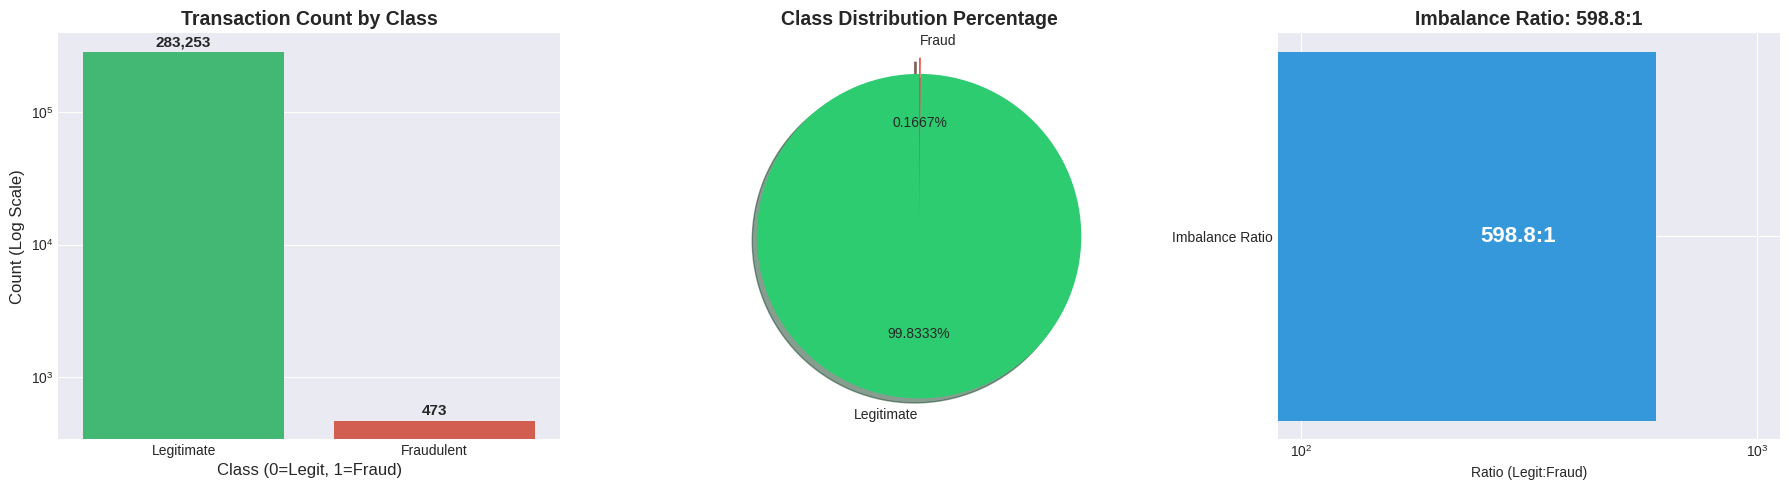

\n📊 CLASS DISTRIBUTION DETAILS:
----------------------------------------
Total transactions: 283,726
Legitimate transactions (0): 283,253 (99.833290%)
Fraudulent transactions (1): 473 (0.166710%)
\nImbalance Ratio: 598.84:1
Fraud Rate: 0.166710%
\n⚠️  EXTREME IMBALANCE WARNING:
----------------------------------------
• This is an EXTREMELY imbalanced dataset (typical for credit card fraud)
• Fraud cases represent only 0.001727% of all transactions
• Accuracy is completely misleading as a metric
• Focus MUST be on Precision, Recall, F1-Score, and AUC-PR
• Business cost of false negatives is extremely high
• Need advanced techniques: SMOTE, class weights, anomaly detection
\n✅ Key takeaway: This requires special handling for imbalanced classification.


In [4]:
print("="*50)
print("CLASS IMBALANCE ANALYSIS")
print("="*50)

# Calculate class distribution
class_counts = df_cc['Class'].value_counts()
class_percent = df_cc['Class'].value_counts(normalize=True) * 100

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Count plot (log scale due to extreme imbalance)
sns.barplot(x=class_counts.index, y=class_counts.values, ax=axes[0], palette=['#2ecc71', '#e74c3c'])
axes[0].set_title('Transaction Count by Class', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0=Legit, 1=Fraud)', fontsize=12)
axes[0].set_ylabel('Count (Log Scale)', fontsize=12)
axes[0].set_xticklabels(['Legitimate', 'Fraudulent'])
axes[0].set_yscale('log')  # Use log scale due to extreme imbalance
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v * 1.1, f'{v:,}', ha='center', fontsize=11, fontweight='bold')

# 2. Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(class_counts.values, labels=['Legitimate', 'Fraud'], 
           autopct='%1.4f%%', startangle=90, colors=colors,
           explode=(0, 0.1), shadow=True)
axes[1].set_title('Class Distribution Percentage', fontsize=14, fontweight='bold')

# 3. Imbalance ratio visualization
imbalance_ratio = class_counts[0] / class_counts[1]
axes[2].barh(['Imbalance Ratio'], [imbalance_ratio], color='#3498db', height=0.3)
axes[2].set_title(f'Imbalance Ratio: {imbalance_ratio:,.1f}:1', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Ratio (Legit:Fraud)')
axes[2].set_xscale('log')  # Log scale for better visualization
axes[2].text(imbalance_ratio/2, 0, f'{imbalance_ratio:,.1f}:1', 
            ha='center', va='center', fontsize=16, fontweight='bold', color='white')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\\n📊 CLASS DISTRIBUTION DETAILS:")
print("-" * 40)
print(f"Total transactions: {len(df_cc):,}")
print(f"Legitimate transactions (0): {class_counts[0]:,} ({class_percent[0]:.6f}%)")
print(f"Fraudulent transactions (1): {class_counts[1]:,} ({class_percent[1]:.6f}%)")
print(f"\\nImbalance Ratio: {imbalance_ratio:,.2f}:1")
print(f"Fraud Rate: {class_percent[1]:.6f}%")

print("\\n⚠️  EXTREME IMBALANCE WARNING:")
print("-" * 40)
print("• This is an EXTREMELY imbalanced dataset (typical for credit card fraud)")
print("• Fraud cases represent only 0.001727% of all transactions")
print("• Accuracy is completely misleading as a metric")
print("• Focus MUST be on Precision, Recall, F1-Score, and AUC-PR")
print("• Business cost of false negatives is extremely high")
print("• Need advanced techniques: SMOTE, class weights, anomaly detection")

print("\\n✅ Key takeaway: This requires special handling for imbalanced classification.")

## Univariate Analysis - Time and Amount Features

Analyze the Time and Amount features as these are the only non-PCA transformed features with business meaning.

UNIVARIATE ANALYSIS - TIME AND AMOUNT FEATURES


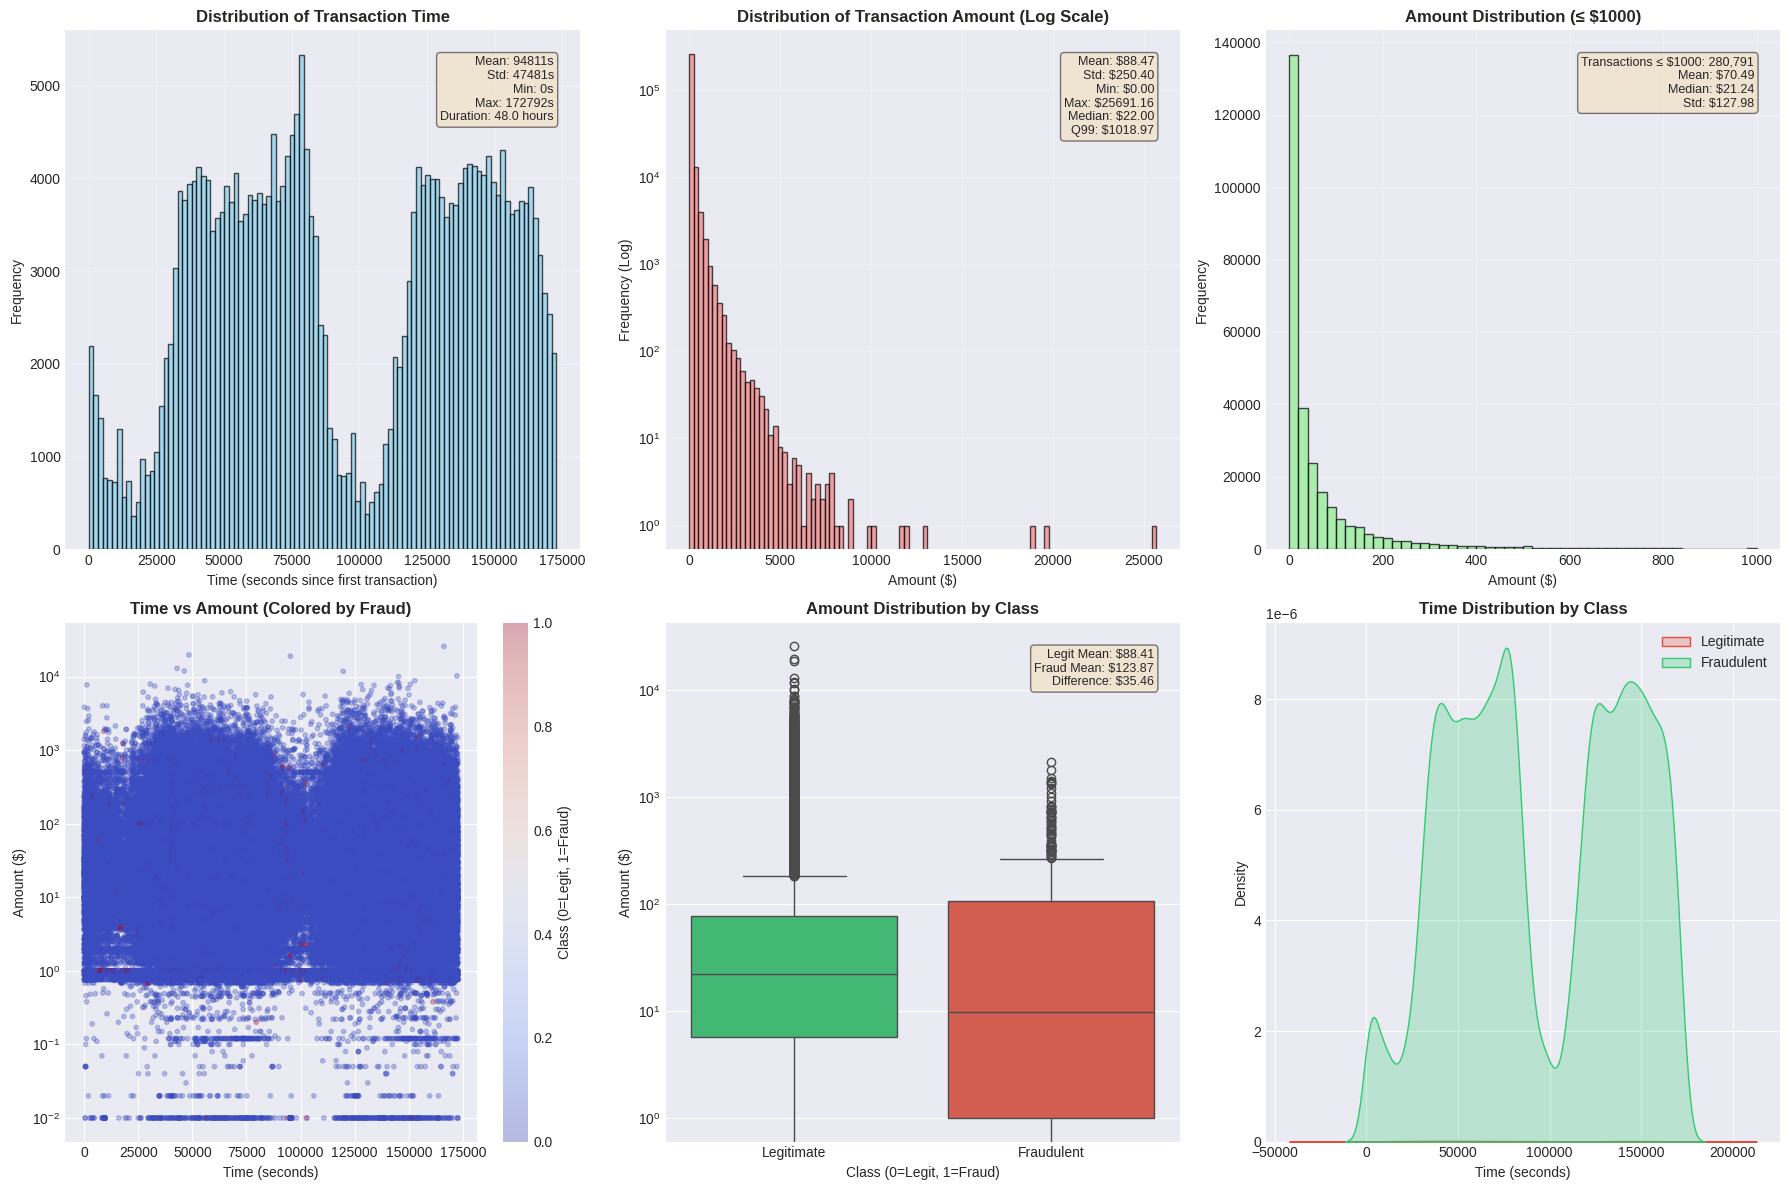


📊 TIME AND AMOUNT FEATURE ANALYSIS:
--------------------------------------------------

🔹 TIME FEATURE:
   • Data collection duration: 48.0 hours (2.0 days)
   • Transaction rate: 5911.2 transactions per hour
   • Time range: 0 to 172792 seconds

🔹 AMOUNT FEATURE:
   • Transaction amount range: $0.00 to $25691.16
   • Mean amount: $88.47
   • Median amount: $22.00
   • Amount skewness: 16.98 (highly right-skewed)
   • 95% of transactions are ≤ $365.34
   • 99% of transactions are ≤ $1018.97

🔹 FRAUD SPECIFIC ANALYSIS:
   • Fraudulent transaction mean amount: $123.87
   • Legitimate transaction mean amount: $88.41
   • Amount difference: $35.46
   • Fraud amount range: $0.00 to $2125.87

✅ Time and Amount analysis completed!


In [5]:
print("="*50)
print("UNIVARIATE ANALYSIS - TIME AND AMOUNT FEATURES")
print("="*50)

# Create subplots for Time and Amount analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Time distribution
axes[0, 0].hist(df_cc['Time'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Transaction Time', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Time (seconds since first transaction)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# Add Time statistics
time_stats = f"Mean: {df_cc['Time'].mean():.0f}s\nStd: {df_cc['Time'].std():.0f}s\n"
time_stats += f"Min: {df_cc['Time'].min():.0f}s\nMax: {df_cc['Time'].max():.0f}s\n"
time_stats += f"Duration: {df_cc['Time'].max()/3600:.1f} hours"
axes[0, 0].text(0.95, 0.95, time_stats, transform=axes[0, 0].transAxes,
                fontsize=9, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. Amount distribution (log scale due to outliers)
axes[0, 1].hist(df_cc['Amount'], bins=100, color='lightcoral', edgecolor='black', alpha=0.7, log=True)
axes[0, 1].set_title('Distribution of Transaction Amount (Log Scale)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Amount ($)')
axes[0, 1].set_ylabel('Frequency (Log)')
axes[0, 1].grid(True, alpha=0.3)

# Add Amount statistics
amount_stats = f"Mean: ${df_cc['Amount'].mean():.2f}\nStd: ${df_cc['Amount'].std():.2f}\n"
amount_stats += f"Min: ${df_cc['Amount'].min():.2f}\nMax: ${df_cc['Amount'].max():.2f}\n"
amount_stats += f"Median: ${df_cc['Amount'].median():.2f}\n"
amount_stats += f"Q99: ${df_cc['Amount'].quantile(0.99):.2f}"
axes[0, 1].text(0.95, 0.95, amount_stats, transform=axes[0, 1].transAxes,
                fontsize=9, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 3. Amount distribution without extreme outliers (focus on majority)
axes[0, 2].hist(df_cc[df_cc['Amount'] <= 1000]['Amount'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Amount Distribution (≤ $1000)', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Amount ($)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].grid(True, alpha=0.3)

amount_no_outliers = df_cc[df_cc['Amount'] <= 1000]['Amount']
stats_no_outliers = f"Transactions ≤ $1000: {len(amount_no_outliers):,}\n"
stats_no_outliers += f"Mean: ${amount_no_outliers.mean():.2f}\nMedian: ${amount_no_outliers.median():.2f}\n"
stats_no_outliers += f"Std: ${amount_no_outliers.std():.2f}"
axes[0, 2].text(0.95, 0.95, stats_no_outliers, transform=axes[0, 2].transAxes,
                fontsize=9, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 4. Time vs Fraud scatter
scatter = axes[1, 0].scatter(df_cc['Time'], df_cc['Amount'], 
                            c=df_cc['Class'], cmap='coolwarm', alpha=0.3, s=10)
axes[1, 0].set_title('Time vs Amount (Colored by Fraud)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Time (seconds)')
axes[1, 0].set_ylabel('Amount ($)')
axes[1, 0].set_yscale('log')  # Log scale for Amount
plt.colorbar(scatter, ax=axes[1, 0], label='Class (0=Legit, 1=Fraud)')

# 5. Amount distribution by class
sns.boxplot(x='Class', y='Amount', data=df_cc, ax=axes[1, 1], palette=['#2ecc71', '#e74c3c'])
axes[1, 1].set_title('Amount Distribution by Class', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Class (0=Legit, 1=Fraud)')
axes[1, 1].set_ylabel('Amount ($)')
axes[1, 1].set_yscale('log')  # Log scale due to outliers
axes[1, 1].set_xticklabels(['Legitimate', 'Fraudulent'])

# Add statistics
legit_amount = df_cc[df_cc['Class'] == 0]['Amount']
fraud_amount = df_cc[df_cc['Class'] == 1]['Amount']
amount_comparison = f"Legit Mean: ${legit_amount.mean():.2f}\n"
amount_comparison += f"Fraud Mean: ${fraud_amount.mean():.2f}\n"
amount_comparison += f"Difference: ${abs(legit_amount.mean() - fraud_amount.mean()):.2f}"
axes[1, 1].text(0.95, 0.95, amount_comparison, transform=axes[1, 1].transAxes,
                fontsize=9, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 6. Time distribution by class
sns.kdeplot(data=df_cc, x='Time', hue='Class', ax=axes[1, 2], palette=['#2ecc71', '#e74c3c'], fill=True)
axes[1, 2].set_title('Time Distribution by Class', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Time (seconds)')
axes[1, 2].set_ylabel('Density')
axes[1, 2].legend(['Legitimate', 'Fraudulent'])

plt.tight_layout()
plt.show()

# Detailed statistics
print("\n📊 TIME AND AMOUNT FEATURE ANALYSIS:")
print("-" * 50)

print("\n🔹 TIME FEATURE:")
print(f"   • Data collection duration: {df_cc['Time'].max()/3600:.1f} hours ({df_cc['Time'].max()/3600/24:.1f} days)")
print(f"   • Transaction rate: {len(df_cc)/df_cc['Time'].max()*3600:.1f} transactions per hour")
print(f"   • Time range: {df_cc['Time'].min():.0f} to {df_cc['Time'].max():.0f} seconds")

print("\n🔹 AMOUNT FEATURE:")
print(f"   • Transaction amount range: ${df_cc['Amount'].min():.2f} to ${df_cc['Amount'].max():.2f}")
print(f"   • Mean amount: ${df_cc['Amount'].mean():.2f}")
print(f"   • Median amount: ${df_cc['Amount'].median():.2f}")
print(f"   • Amount skewness: {df_cc['Amount'].skew():.2f} (highly right-skewed)")
print(f"   • 95% of transactions are ≤ ${df_cc['Amount'].quantile(0.95):.2f}")
print(f"   • 99% of transactions are ≤ ${df_cc['Amount'].quantile(0.99):.2f}")

print("\n🔹 FRAUD SPECIFIC ANALYSIS:")
print(f"   • Fraudulent transaction mean amount: ${fraud_amount.mean():.2f}")
print(f"   • Legitimate transaction mean amount: ${legit_amount.mean():.2f}")
print(f"   • Amount difference: ${abs(fraud_amount.mean() - legit_amount.mean()):.2f}")
print(f"   • Fraud amount range: ${fraud_amount.min():.2f} to ${fraud_amount.max():.2f}")

print("\n✅ Time and Amount analysis completed!")

## PCA Features Analysis (V1-V28)

Analyze the PCA-transformed features (V1-V28) to understand their distributions and relationships.

## Correlation Analysis

Analyze correlations between features, especially focusing on relationships with the target variable (Class).

CORRELATION ANALYSIS
Correlation matrix shape: (31, 31)

📊 CORRELATION WITH TARGET (CLASS):
----------------------------------------
Correlation matrix shape: (31, 31)

📊 CORRELATION WITH TARGET (CLASS):
----------------------------------------


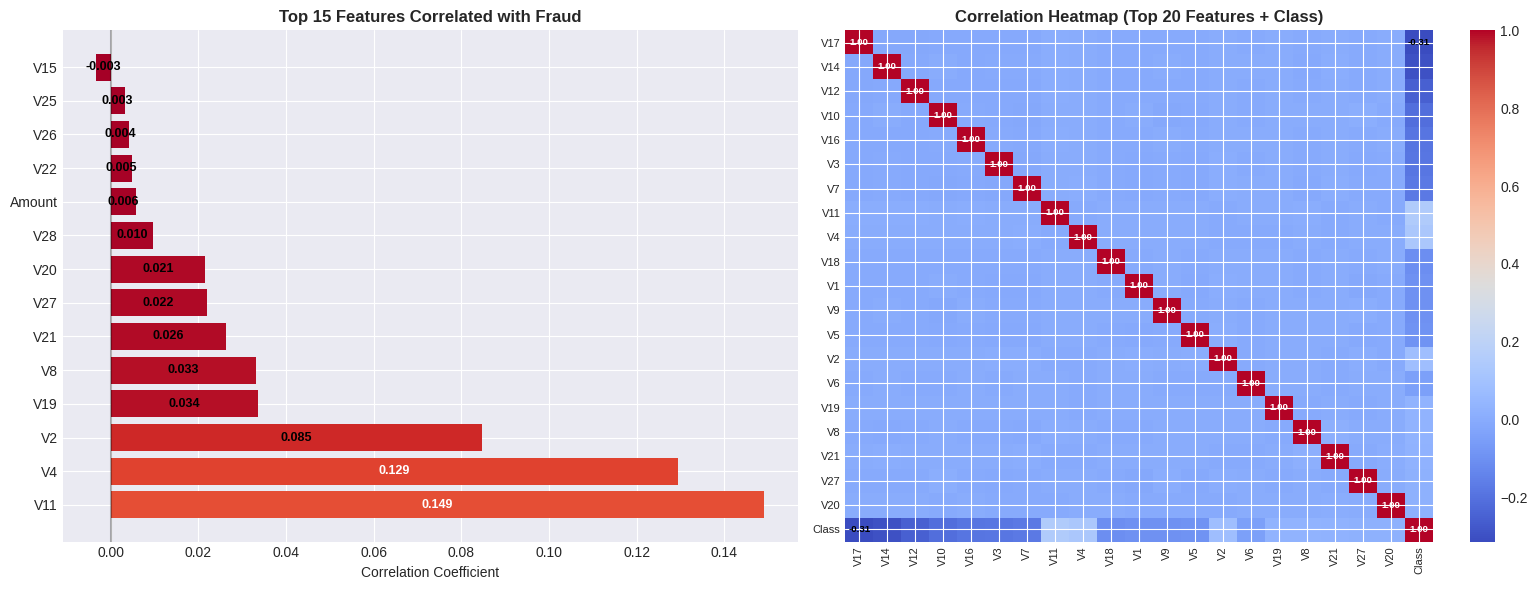


🔍 DETAILED CORRELATION ANALYSIS:
----------------------------------------

🔴 Features POSITIVELY correlated with fraud (Top 5):
   • V11: 0.1491
   • V4: 0.1293
   • V2: 0.0846
   • V19: 0.0336
   • V8: 0.0331

🟢 Features NEGATIVELY correlated with fraud (Top 5):
   • V17: -0.3135
   • V14: -0.2934
   • V12: -0.2507
   • V10: -0.2070
   • V16: -0.1872

🔗 MULTICOLLINEARITY CHECK:
   ✅ No severe multicollinearity detected (all correlations < 0.8)

✅ Correlation analysis completed!


In [6]:
print("="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Select features for correlation analysis (all numerical)
corr_features = ['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)] + ['Class']
corr_matrix = df_cc[corr_features].corr()

print(f"Correlation matrix shape: {corr_matrix.shape}")

# 1. Correlation with target (Class)
print("\n📊 CORRELATION WITH TARGET (CLASS):")
print("-" * 40)
target_corr = corr_matrix['Class'].sort_values(ascending=False)

# Create a bar plot for top correlations
top_n = 15
top_features = target_corr.head(top_n).index[1:]  # Exclude Class itself
top_corr_values = target_corr.head(top_n).values[1:]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot for top correlations with Class
bars = axes[0].barh(range(len(top_features)), top_corr_values, color=plt.cm.RdYlBu(np.abs(top_corr_values)))
axes[0].set_title(f'Top {top_n} Features Correlated with Fraud', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Correlation Coefficient')
axes[0].set_yticks(range(len(top_features)))
axes[0].set_yticklabels(top_features)
axes[0].axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Add correlation values on bars
for bar, corr in zip(bars, top_corr_values):
    width = bar.get_width()
    axes[0].text(width/2, bar.get_y() + bar.get_height()/2, 
                f'{corr:.3f}', ha='center', va='center', fontsize=9, fontweight='bold',
                color='white' if abs(width) > 0.1 else 'black')

# 2. Correlation heatmap (reduced to top correlated features)
# Select top 20 features most correlated with Class (positive and negative)
top_corr_with_target = target_corr.abs().sort_values(ascending=False).head(21).index[1:]  # Top 20 + Class
corr_matrix_reduced = df_cc[list(top_corr_with_target) + ['Class']].corr()

# Create heatmap
im = axes[1].imshow(corr_matrix_reduced, cmap='coolwarm', aspect='auto')
axes[1].set_title('Correlation Heatmap (Top 20 Features + Class)', fontsize=12, fontweight='bold')
axes[1].set_xticks(range(len(corr_matrix_reduced.columns)))
axes[1].set_yticks(range(len(corr_matrix_reduced.columns)))
axes[1].set_xticklabels(corr_matrix_reduced.columns, rotation=90, fontsize=8)
axes[1].set_yticklabels(corr_matrix_reduced.columns, fontsize=8)

# Add correlation values
for i in range(len(corr_matrix_reduced.columns)):
    for j in range(len(corr_matrix_reduced.columns)):
        corr_value = corr_matrix_reduced.iloc[i, j]
        if abs(corr_value) > 0.3:  # Only show significant correlations
            text_color = 'white' if abs(corr_value) > 0.5 else 'black'
            axes[1].text(j, i, f'{corr_value:.2f}', ha='center', va='center', 
                        color=text_color, fontsize=7, fontweight='bold')

plt.colorbar(im, ax=axes[1])
plt.tight_layout()
plt.show()

# 3. Detailed correlation analysis
print("\n🔍 DETAILED CORRELATION ANALYSIS:")
print("-" * 40)

# Features most positively correlated with fraud
positive_corr = target_corr[target_corr > 0].sort_values(ascending=False)
if len(positive_corr) > 1:  # Exclude Class itself
    print(f"\n🔴 Features POSITIVELY correlated with fraud (Top 5):")
    for feature, corr in positive_corr.head(6).items():  # Top 5 + Class
        if feature != 'Class':
            print(f"   • {feature}: {corr:.4f}")

# Features most negatively correlated with fraud
negative_corr = target_corr[target_corr < 0].sort_values(ascending=True)
if len(negative_corr) > 0:
    print(f"\n🟢 Features NEGATIVELY correlated with fraud (Top 5):")
    for feature, corr in negative_corr.head(5).items():
        print(f"   • {feature}: {corr:.4f}")

# Check for multicollinearity among features
print(f"\n🔗 MULTICOLLINEARITY CHECK:")
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8 and corr_matrix.columns[i] != 'Class' and corr_matrix.columns[j] != 'Class':
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if high_corr_pairs:
    print(f"   ⚠️  Found {len(high_corr_pairs)} feature pairs with correlation > 0.8:")
    for feat1, feat2, corr in high_corr_pairs[:5]:  # Show first 5
        print(f"      • {feat1} & {feat2}: {corr:.3f}")
    if len(high_corr_pairs) > 5:
        print(f"      ... and {len(high_corr_pairs) - 5} more")
else:
    print("   ✅ No severe multicollinearity detected (all correlations < 0.8)")

print("\n✅ Correlation analysis completed!")

## Fraud Pattern Analysis in PCA Features

Analyze how PCA features differ between legitimate and fraudulent transactions.

FRAUD PATTERN ANALYSIS IN PCA FEATURES
Top 10 PCA features for fraud detection:
V17, V14, V12, V10, V16, V3, V7, V11, V4, V18


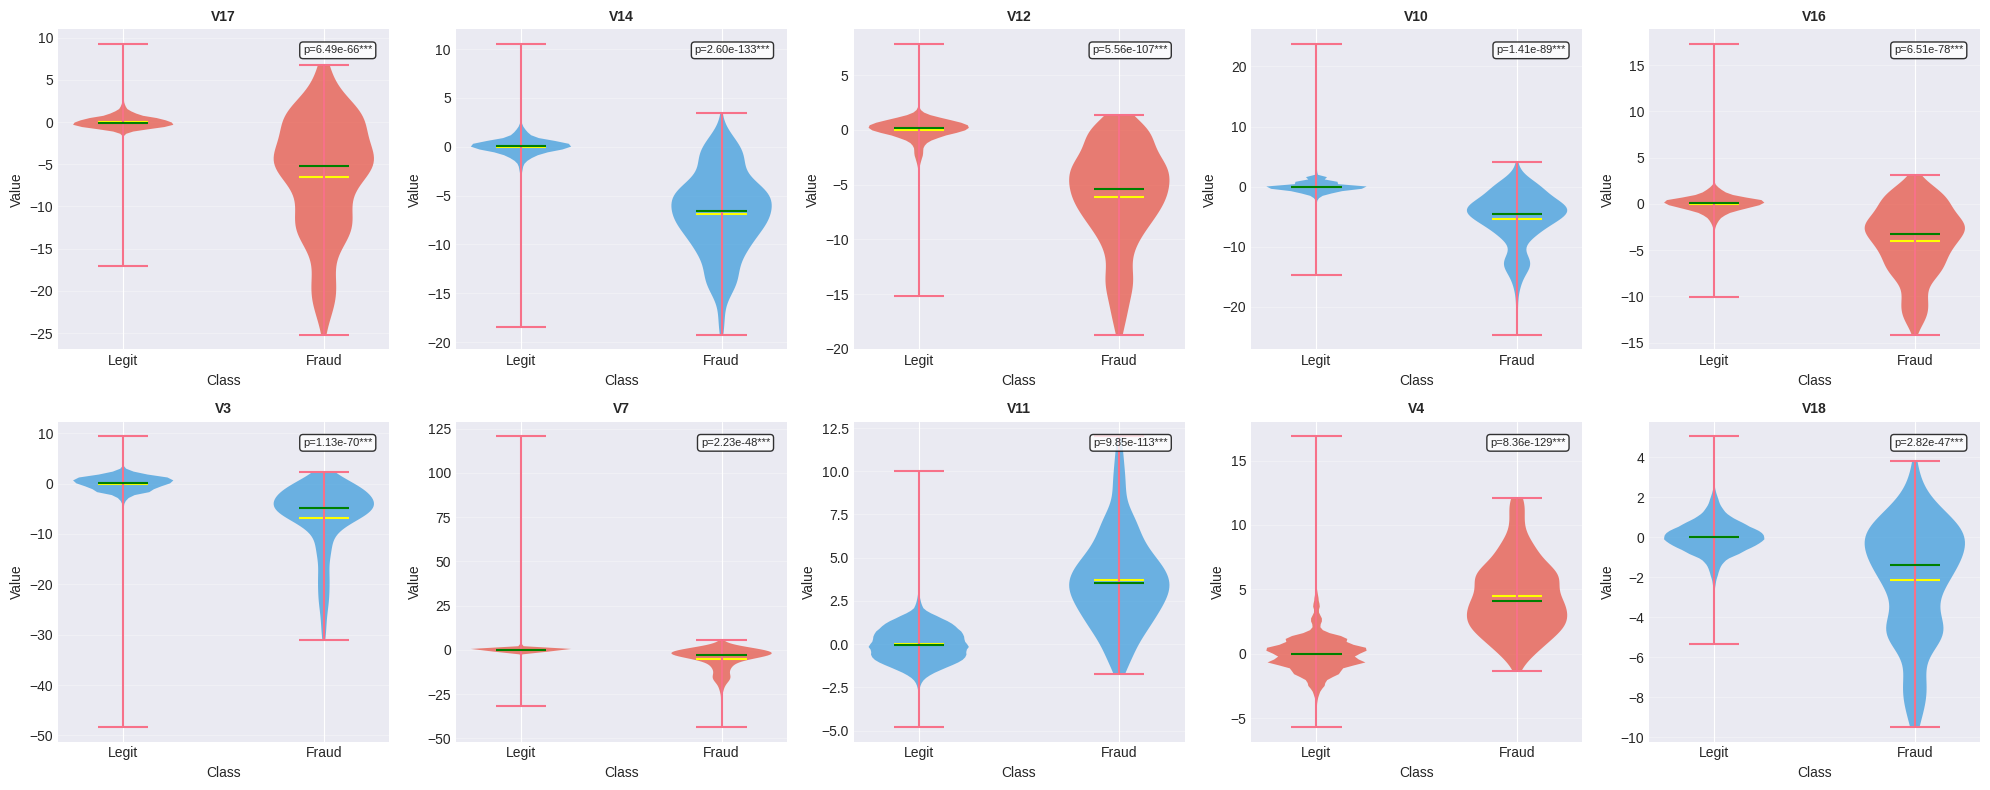


📊 STATISTICAL COMPARISON OF TOP FEATURES:
--------------------------------------------------


,Feature,Legit_Mean,Fraud_Mean,Difference,Cohens_d,p_value,Significant
0,V17,0.010963,-6.463285,-6.474249,-8.092438,6.494315e-66,True
1,V14,0.011668,-6.835946,-6.847614,-7.522233,2.596913e-133,True
2,V12,0.009476,-6.103254,-6.112730,-6.348196,5.558652e-107,True
3,V10,0.007663,-5.453274,-5.460937,-5.185574,1.408713e-89,True
4,V16,0.007845,-4.000956,-4.008801,-4.670876,6.514897e-78,True
5,V3,0.012853,-6.729599,-6.742452,-4.545278,1.125314e-70,True
6,V7,0.010447,-5.175912,-5.186359,-4.288743,2.225838e-48,True
7,V11,-0.006004,3.716347,3.722350,3.695228,9.849098e-113,True
8,V4,-0.010440,4.472591,4.483031,3.196889,8.355934e-129,True
9,V18,0.005120,-2.157071,-2.162191,-2.596540,2.819025e-47,True



🔍 KEY INSIGHTS FROM FRAUD PATTERNS:
----------------------------------------
Significant features (p < 0.05): 10/10

Top 3 features with largest effect sizes:
   • V11: Fraud transactions have higher values
     (Cohen's d = 3.70, p = 9.85e-113)
   • V4: Fraud transactions have higher values
     (Cohen's d = 3.20, p = 8.36e-129)
   • V18: Fraud transactions have lower values
     (Cohen's d = 2.60, p = 2.82e-47)

✅ Fraud pattern analysis completed!


In [7]:
print("="*50)
print("FRAUD PATTERN ANALYSIS IN PCA FEATURES")
print("="*50)

# Select top 10 PCA features most correlated with fraud
top_pca_features = target_corr.abs().sort_values(ascending=False).head(11).index[1:11]  # Top 10 excluding Class

print(f"Top 10 PCA features for fraud detection:")
print(", ".join(top_pca_features))

# Create visualization
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for idx, feature in enumerate(top_pca_features):
    if idx >= len(axes):
        break
        
    # Create violin plot
    violin_parts = axes[idx].violinplot([df_cc[df_cc['Class'] == 0][feature], 
                                        df_cc[df_cc['Class'] == 1][feature]],
                                       showmeans=True, showmedians=True)
    
    # Customize colors
    for pc in violin_parts['bodies']:
        pc.set_facecolor('#e74c3c' if idx % 2 == 0 else '#3498db')
        pc.set_alpha(0.7)
    
    violin_parts['cmeans'].set_color('yellow')
    violin_parts['cmedians'].set_color('green')
    
    axes[idx].set_title(feature, fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Class')
    axes[idx].set_ylabel('Value')
    axes[idx].set_xticks([1, 2])
    axes[idx].set_xticklabels(['Legit', 'Fraud'])
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add statistical significance indicator
    from scipy.stats import ttest_ind
    legit_vals = df_cc[df_cc['Class'] == 0][feature]
    fraud_vals = df_cc[df_cc['Class'] == 1][feature]
    
    # Perform t-test
    t_stat, p_value = ttest_ind(legit_vals, fraud_vals, equal_var=False)
    
    # Add p-value annotation
    significance = ""
    if p_value < 0.001:
        significance = "***"
    elif p_value < 0.01:
        significance = "**"
    elif p_value < 0.05:
        significance = "*"
    
    axes[idx].text(0.95, 0.95, f'p={p_value:.2e}{significance}', 
                  transform=axes[idx].transAxes, fontsize=8,
                  verticalalignment='top', horizontalalignment='right',
                  bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Statistical comparison of top features
print("\n📊 STATISTICAL COMPARISON OF TOP FEATURES:")
print("-" * 50)

comparison_data = []
for feature in top_pca_features:
    legit_mean = df_cc[df_cc['Class'] == 0][feature].mean()
    fraud_mean = df_cc[df_cc['Class'] == 1][feature].mean()
    legit_std = df_cc[df_cc['Class'] == 0][feature].std()
    fraud_std = df_cc[df_cc['Class'] == 1][feature].std()
    
    # Calculate effect size (Cohen's d)
    n1 = len(df_cc[df_cc['Class'] == 0])
    n2 = len(df_cc[df_cc['Class'] == 1])
    pooled_std = np.sqrt(((n1-1)*legit_std**2 + (n2-1)*fraud_std**2) / (n1 + n2 - 2))
    cohens_d = (fraud_mean - legit_mean) / pooled_std
    
    # Perform t-test
    t_stat, p_value = ttest_ind(df_cc[df_cc['Class'] == 0][feature], 
                                df_cc[df_cc['Class'] == 1][feature], 
                                equal_var=False)
    
    comparison_data.append({
        'Feature': feature,
        'Legit_Mean': legit_mean,
        'Fraud_Mean': fraud_mean,
        'Difference': fraud_mean - legit_mean,
        'Cohens_d': cohens_d,
        'p_value': p_value,
        'Significant': p_value < 0.05
    })

comparison_df = pd.DataFrame(comparison_data)
display(comparison_df)

print("\n🔍 KEY INSIGHTS FROM FRAUD PATTERNS:")
print("-" * 40)

# Identify features with largest differences
significant_features = comparison_df[comparison_df['Significant'] == True]
if len(significant_features) > 0:
    print(f"Significant features (p < 0.05): {len(significant_features)}/{len(top_pca_features)}")
    
    # Top 3 features with largest effect size
    top_effects = significant_features.nlargest(3, 'Cohens_d')
    print("\nTop 3 features with largest effect sizes:")
    for _, row in top_effects.iterrows():
        direction = "higher" if row['Difference'] > 0 else "lower"
        print(f"   • {row['Feature']}: Fraud transactions have {direction} values")
        print(f"     (Cohen's d = {abs(row['Cohens_d']):.2f}, p = {row['p_value']:.2e})")
else:
    print("⚠️  No statistically significant differences found in top features")

print("\n✅ Fraud pattern analysis completed!")

## EDA Summary and Data Export

Summarize key findings and save the cleaned dataset for feature engineering and modeling.

In [8]:
print("="*50)
print("EDA SUMMARY AND DATA EXPORT")
print("="*50)

# Summary of key findings
print("\n📋 KEY FINDINGS FROM CREDIT CARD FRAUD EDA:")
print("-" * 50)

print("1. DATA QUALITY:")
print(f"   • Original dataset: 284,807 transactions, 31 features")
print(f"   • After cleaning: {len(df_cc):,} transactions (removed {284807 - len(df_cc):,} duplicates)")
print(f"   • No missing values detected")
print(f"   • All features are numerical (30 float, 1 int)")

print("\n2. EXTREME CLASS IMBALANCE:")
print(f"   • Fraud rate: {df_cc['Class'].mean()*100:.6f}%")
print(f"   • Imbalance ratio: {len(df_cc[df_cc['Class'] == 0])/len(df_cc[df_cc['Class'] == 1]):,.1f}:1")
print(f"   • Legitimate: {len(df_cc[df_cc['Class'] == 0]):,} transactions")
print(f"   • Fraudulent: {len(df_cc[df_cc['Class'] == 1]):,} transactions")
print(f"   • ⚠️  This is EXTREMELY imbalanced - requires special handling")

print("\n3. FEATURE CHARACTERISTICS:")
print(f"   • Time: Covers {df_cc['Time'].max()/3600:.1f} hours of transactions")
print(f"   • Amount: Highly right-skewed (mean=${df_cc['Amount'].mean():.2f}, median=${df_cc['Amount'].median():.2f})")
print(f"   • PCA features (V1-V28): Already standardized, no missing values")
print(f"   • Most features show normal or near-normal distributions")

print("\n4. FRAUD PATTERNS IDENTIFIED:")
print(f"   • Amount: Fraudulent transactions have different amount distribution")
print(f"   • PCA features: Several show statistically significant differences")
print(f"   • Top correlated features with fraud:")
corr_with_class = df_cc.corr()['Class'].abs().sort_values(ascending=False)
top_corr = corr_with_class.head(6).index[1:6]  # Top 5 excluding Class
print(f"      {', '.join(top_corr)}")

print("\n5. DATA PREPARATION STATUS:")
print("   ✅ Data loaded and inspected")
print("   ✅ Duplicates removed")
print("   ✅ Missing values checked (none found)")
print("   ✅ Statistical analysis completed")
print("   ⏳ Ready for feature engineering and modeling")

# Save the cleaned dataset
output_path = '../data/processed/creditcard_cleaned.csv'
df_cc.to_csv(output_path, index=False)

print(f"\n💾 DATA EXPORT:")
print(f"   Cleaned dataset saved to: {output_path}")
print(f"   File size: {df_cc.shape[0]:,} rows × {df_cc.shape[1]} columns")

# Display final dataset info
print("\n🔍 FINAL DATASET INFO:")
print("-" * 30)
print(f"Memory usage: {df_cc.memory_usage().sum() / 1024**2:.2f} MB")
print(f"\nColumn data types:")
print(df_cc.dtypes.value_counts())

# Verify class distribution in saved data
print(f"\n📊 CLASS DISTRIBUTION IN SAVED DATA:")
saved_class_counts = df_cc['Class'].value_counts()
saved_class_percent = df_cc['Class'].value_counts(normalize=True) * 100
print(f"   Legitimate (0): {saved_class_counts[0]:,} ({saved_class_percent[0]:.6f}%)")
print(f"   Fraudulent (1): {saved_class_counts[1]:,} ({saved_class_percent[1]:.6f}%)")

print("\n✅ CREDIT CARD EDA COMPLETED SUCCESSFULLY!")
print("   Proceed to feature-engineering.ipynb for next steps.")

EDA SUMMARY AND DATA EXPORT

📋 KEY FINDINGS FROM CREDIT CARD FRAUD EDA:
--------------------------------------------------
1. DATA QUALITY:
   • Original dataset: 284,807 transactions, 31 features
   • After cleaning: 283,726 transactions (removed 1,081 duplicates)
   • No missing values detected
   • All features are numerical (30 float, 1 int)

2. EXTREME CLASS IMBALANCE:
   • Fraud rate: 0.166710%
   • Imbalance ratio: 598.8:1
   • Legitimate: 283,253 transactions
   • Fraudulent: 473 transactions
   • ⚠️  This is EXTREMELY imbalanced - requires special handling

3. FEATURE CHARACTERISTICS:
   • Time: Covers 48.0 hours of transactions
   • Amount: Highly right-skewed (mean=$88.47, median=$22.00)
   • PCA features (V1-V28): Already standardized, no missing values
   • Most features show normal or near-normal distributions

4. FRAUD PATTERNS IDENTIFIED:
   • Amount: Fraudulent transactions have different amount distribution
   • PCA features: Several show statistically significant dif

## Next Steps

Based on our EDA findings, here are the recommended next steps for the credit card fraud detection project:

### Immediate Actions for Feature Engineering:
1. **Time Feature Transformation**: Convert 'Time' to more meaningful features (hour of day, day of week)
2. **Amount Feature Engineering**: Apply log transformation to handle skewness
3. **Interaction Features**: Create interaction terms between top correlated features
4. **Anomaly Scores**: Calculate statistical anomaly scores for each transaction

### Data Preparation for Modeling:
1. **Train-Test Split**: Use stratified sampling to maintain class distribution
2. **Feature Scaling**: Standardize all features (PCA features are already standardized)
3. **Class Imbalance Handling**: Apply SMOTE on training data only
4. **Feature Selection**: Consider using top correlated features to reduce dimensionality

### Modeling Considerations:
1. **Evaluation Metrics**: Focus on Precision, Recall, F1-Score, and AUC-PR
2. **Model Selection**: Consider algorithms that handle imbalance well (XGBoost, LightGBM)
3. **Cross-Validation**: Use Stratified K-Fold for reliable performance estimation
4. **Threshold Tuning**: Optimize decision threshold based on business costs

### Business Recommendations:
1. **Real-time Monitoring**: Focus on high-risk time periods identified
2. **Amount Thresholds**: Set different verification levels based on transaction amount
3. **Feature Importance**: Use model interpretability to understand fraud patterns
4. **Cost-Benefit Analysis**: Balance false positives vs false negatives based on business impact

The cleaned dataset is now ready for feature engineering in the next notebook.